<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

#Introduction
Transfer learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task. By applying transfer learnong to a new task, one can gain significantly higher performance than training with only a small amount of data. This method is so common that it is rare to train a model for an image or NLP related task from scratch.
<p> Examples of models that have the basis of transfer learning are Inception, AlexNet and ImageNet.

#Classiscal Transfer Learning
 
Let's discuss these points:
 
* $Which$ part od=f the knowledge can be transfered from the source to the target in order to improve the performance of the task
 
* $When$ to transfer and when not to, so that one can improve the target results
 
* $How$ to transfer the knowledge gained from the source model based on our current task
 
<p> There are three different categories of transfer learning:
 
1. Inductive Transfer Leraning : It requires the source and target domain to be same
 
2. Transductive Transfer Learning : Where the domains of the source and target task are not exactly the same but interrelated uses Transductive Transfer Learning.
 
3. Unsupervised Transfer Learning : It is similar to Inductive Transfer learning but the algorithm focuses on unsupervised tasks and involves an unlabeled dataset both in source and target tasks.
 
<p> These are the two major transfer learning scenerios looks as follows:
 
* Fine Tuning the convnet : Instead of random initialization, we initialize the network with the pretrained network, like the one that is trained on imagenet 1000 dataset.
 
* ConvNet as a fixed feature extractor : This will freeze the weights for all of the network except that of the final FC layer.

In [ ]:
#Importing important modules
import pandas as pd
import numpy as np 
import os
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import PReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

Dataset can be downloaded from [Dataset ](https://drive.google.com/drive/folders/1XyCfnPyTHeRV2rozPR5HP1kPEocIv3Gd?usp=sharing)

The first step will train a base network on a base dataset, and then repropose the learned features, or transfer them, to a second target network to be trained on a target dataset and task.
 
<p> The  image augumentation API is simple and powerful. It will use the ImageDataGenerator to fetch data and feed it to tha network.
The data generator is an iterator, returning batches of image samples from the directory when requested.


In [ ]:
!pip install deepstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
img_h,img_w= (300,300)
batch_size=128
epochs=4
n_class=48

In [ ]:
#Concatenating train and test directory
base_dir = '/content/drive/MyDrive/DEVNAGARI_NEW'
train_dir = os.path.join(base_dir, 'TRAIN')
validation_dir = os.path.join(base_dir, 'TEST')

#VGG - 19
It is a CNN architecture that secures first and second positions in the localisation and classification tasks in ImageNet challeneges. The main contribution of VGG is to show that classification accuracy can be improved by increasing the deapth of CNN inspite of using small receptive fields in the layers.
 
#Inception - V3
 
Using multiple features from multiple filters improves the performance of the network. Other than that, there is another fact that makes the inception architecture better than others. All the architectures prior to inception performed convolution on the spatial and channel-wise domain. By performing the $1*1$ convolution, the inception block, is doing cross-channel correlation, ignoring the spatial dimensions. This is followed by cross-spatial and cross-channel correlation through the $3*3$ and $5*5$ filters.

In [ ]:
#Imprting and initializing VGG-19
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

base_model_1=VGG19(include_top=False, weights='imagenet',input_shape=(img_h,img_w,3), pooling='avg')

# Making last layers trainable, because our dataset is much diiferent from the imagenet dataset 
for layer in base_model_1.layers[:-6]:
    layer.trainable=False
    
model_1=Sequential()
model_1.add(base_model_1)

model_1.add(Flatten())
model_1.add(BatchNormalization())
model_1.add(Dropout(0.35))
model_1.add(Dense(n_class,activation='softmax'))
            
model_1.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 48)                24624     
                                                                 
Total params: 20,051,056
Trainable params: 9,464,880
Non-

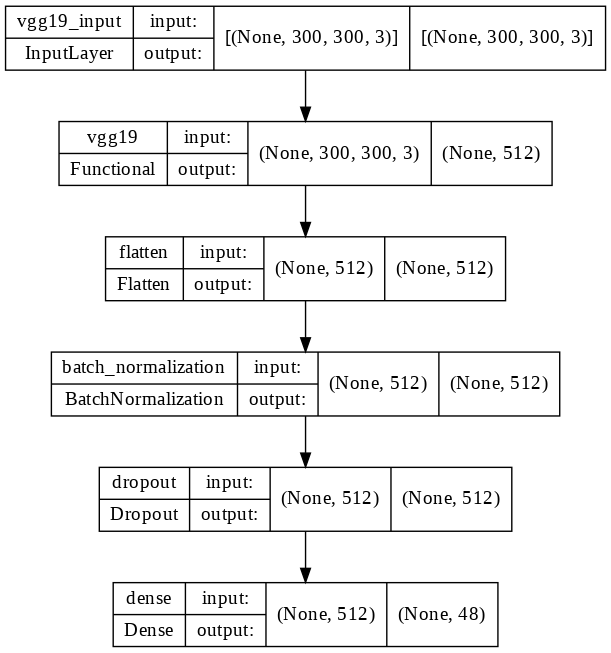

In [ ]:
#Vgg-19 model
tf.keras.utils.plot_model(
    model_1,
    to_file="model_1.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
)

In [ ]:
#Importing and initializing Inception_V3
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model_2= InceptionV3(include_top=False, weights='imagenet',
                                        input_tensor=None, input_shape=(img_h,img_w,3), pooling='avg')

for layer in base_model_2.layers[:-30]:
    layer.trainable=False
model_2=Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(BatchNormalization())
model_2.add(Dense(1024,activation='relu'))
model_2.add(BatchNormalization())

model_2.add(Dense(512,activation='relu'))
model_2.add(Dropout(0.35))
model_2.add(BatchNormalization())

model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(0.35))
model_2.add(BatchNormalization())

model_2.add(Dense(n_class,activation='softmax'))

model_2.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_96 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                       

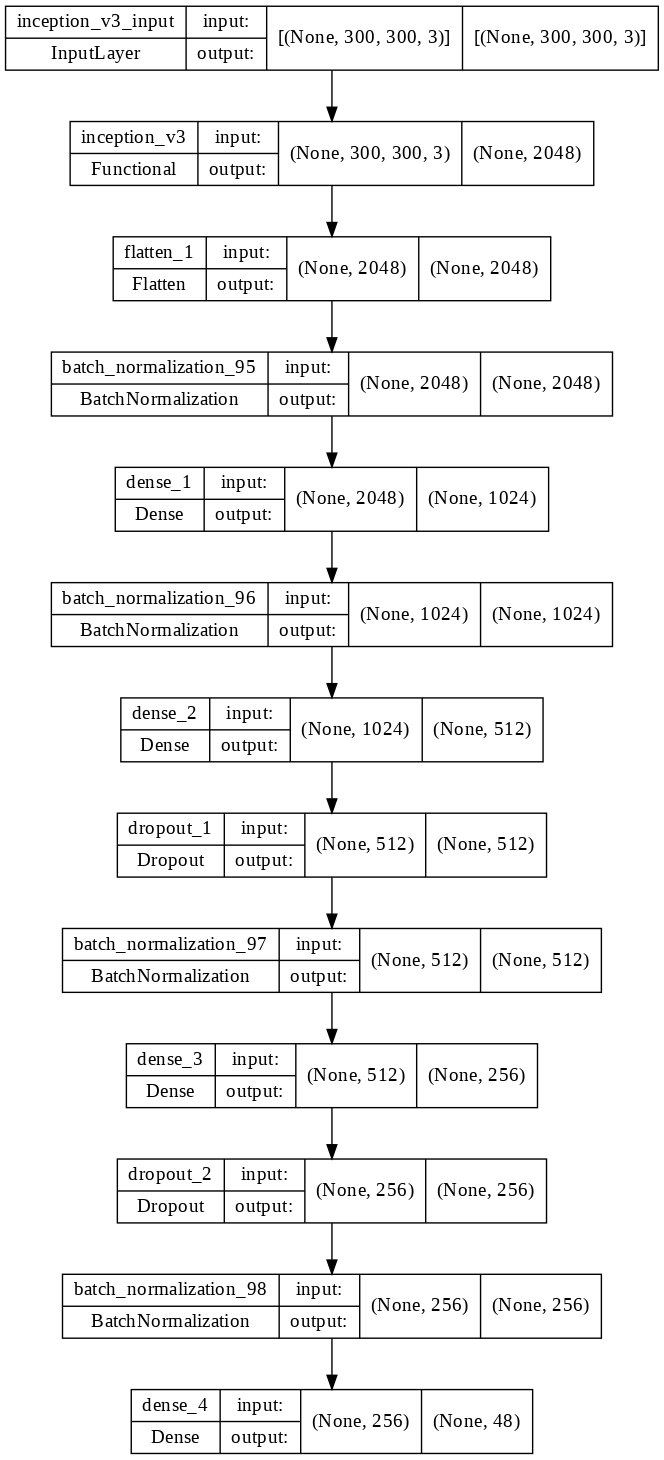

In [ ]:
#Inception_V3 model
tf.keras.utils.plot_model(
    model_2,
    to_file="model_2.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
)

In [ ]:
#Initializing train and test Datagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
         rescale=1./255,
         rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
#applying optimizer
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=3,
                                         cooldown=2,
                                         min_lr=1e-10,
                                         verbose=1)

callbacks = [reduce_learning_rate]
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#Compiling models
model_1.compile( loss='categorical_crossentropy',optimizer= optimizer, metrics=['accuracy'])
model_2.compile( loss='categorical_crossentropy',optimizer= optimizer, metrics=['accuracy'])

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,                   #the source directory for training images
                    target_size=(img_h, img_w),  #images will be resized to 300x300
                    batch_size=batch_size,
                    class_mode='categorical')


from tensorflow.keras.preprocessing.image import ImageDataGenerator
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(img_h, img_w),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 6528 images belonging to 48 classes.
Found 3322 images belonging to 48 classes.


In [ ]:
#fitting model in our dataset
history_1 = model_1.fit(
      train_generator,
      steps_per_epoch=6528//batch_size, 
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=3312//batch_size,  
      callbacks=callbacks,
      verbose=1)

Epoch 1/10
19/51 [==========>...................] - ETA: 1:35:15 - loss: 3.8273 - accuracy: 0.0374

In [ ]:
history_2 = model_2.fit(
      train_generator,
      steps_per_epoch=6528//batch_size, 
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=3312//batch_size,  
      callbacks=callbacks,
      verbose=1)

In [ ]:
#plotting VGG-19 model
import matplotlib.pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('VGG-19 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('VGG-19 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Plotting Inception V3 model
import matplotlib.pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Inception V3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Inception V3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()